In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [3]:
X = dataset[:,0:10]

In [4]:
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale,Y,test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [14]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
hist = model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 18s 23ms/step - loss: 0.7112 - accuracy: 0.5216 - val_loss: 0.7118 - val_accuracy: 0.4384
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4631 - val_loss: 0.7010 - val_accuracy: 0.4475
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4537 - val_loss: 0.6917 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5841 - val_loss: 0.6844 - val_accuracy: 0.5936
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5712 - val_loss: 0.6788 - val_accuracy: 0.6073
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5972 - val_loss: 0.6739 - val_accuracy: 0.6347
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.6491 - val_loss: 0.6689 - val_accuracy: 0.6575
Epoch 8/100

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8466 - val_loss: 0.3209 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8692 - val_loss: 0.3171 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8296 - val_loss: 0.3156 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8523 - val_loss: 0.3110 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8788 - val_loss: 0.3084 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8483 - val_loss: 0.3060 - val_accuracy: 0.9041
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8760 - val_loss: 0.3046 - val_accuracy: 0.8995
Epoch 

In [16]:
model.evaluate(X_test,Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9041


0.9041095972061157

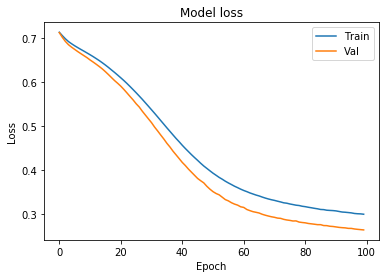

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

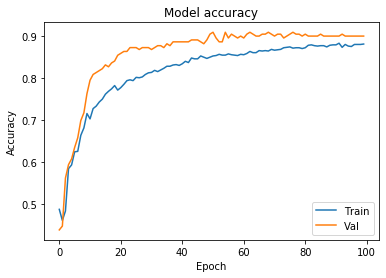

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist_2 = model_2.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 51ms/step - loss: 0.5883 - accuracy: 0.6342 - val_loss: 0.3941 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3866 - accuracy: 0.8386 - val_loss: 0.2876 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3589 - accuracy: 0.8573 - val_loss: 0.2738 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3357 - accuracy: 0.8413 - val_loss: 0.2504 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2999 - accuracy: 0.8783 - val_loss: 0.2392 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 1s 41ms/step - loss: 0.2767 - accuracy: 0.8821 - val_loss: 0.2523 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2643 - accuracy: 0.8773 - val_loss: 0.2739 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 2s 62ms/step - loss: 0.1822 - accuracy: 0.9192 - val_loss: 0.2168 - val_accuracy: 0.9178
Epoch 59/100
32/32 [==============================] - 2s 63ms/step - loss: 0.1341 - accuracy: 0.9351 - val_loss: 0.2123 - val_accuracy: 0.9132
Epoch 60/100
32/32 [==============================] - 2s 58ms/step - loss: 0.1256 - accuracy: 0.9355 - val_loss: 0.2488 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 2s 47ms/step - loss: 0.1350 - accuracy: 0.9423 - val_loss: 0.3297 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 2s 57ms/step - loss: 0.1482 - accuracy: 0.9344 - val_loss: 0.2288 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 2s 66ms/step - loss: 0.1497 - accuracy: 0.9279 - val_loss: 0.1974 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 2s 65ms/step - loss: 0.1485 - accuracy: 0.9255 - val_loss: 0.2977 - val_accuracy: 0.8995
Epoch 65/100

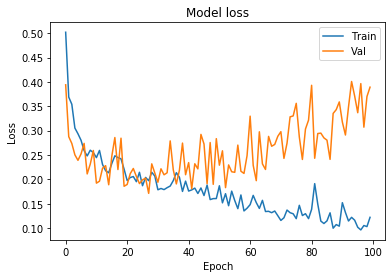

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

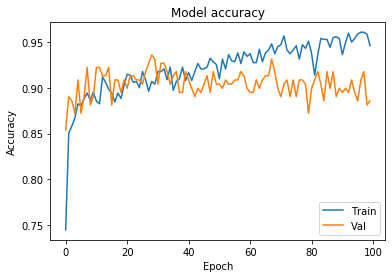

In [24]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
hist_3 = model_3.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 77ms/step - loss: 14.3856 - accuracy: 0.6035 - val_loss: 2.8533 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 2s 62ms/step - loss: 1.9088 - accuracy: 0.7906 - val_loss: 0.6055 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 2s 53ms/step - loss: 0.5776 - accuracy: 0.8644 - val_loss: 0.4979 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5141 - accuracy: 0.8597 - val_loss: 0.4749 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 2s 77ms/step - loss: 0.4987 - accuracy: 0.8646 - val_loss: 0.4563 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 3s 79ms/step - loss: 0.4894 - accuracy: 0.8528 - val_loss: 0.4582 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 2s 75ms/step - loss: 0.5022 - accuracy: 0.8669 - val_loss: 0.4372 - val_accuracy: 0.8995
Epoch

32/32 [==============================] - 2s 71ms/step - loss: 0.4705 - accuracy: 0.8623 - val_loss: 0.3943 - val_accuracy: 0.9132
Epoch 59/100
32/32 [==============================] - 3s 95ms/step - loss: 0.4305 - accuracy: 0.8781 - val_loss: 0.3979 - val_accuracy: 0.9132
Epoch 60/100
32/32 [==============================] - 3s 93ms/step - loss: 0.4176 - accuracy: 0.8930 - val_loss: 0.3976 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 3s 104ms/step - loss: 0.4318 - accuracy: 0.8848 - val_loss: 0.4201 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 2s 75ms/step - loss: 0.4468 - accuracy: 0.8726 - val_loss: 0.4099 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 3s 81ms/step - loss: 0.4222 - accuracy: 0.8892 - val_loss: 0.4129 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 2s 74ms/step - loss: 0.4562 - accuracy: 0.8733 - val_loss: 0.3966 - val_accuracy: 0.9132
Epoch 65/10

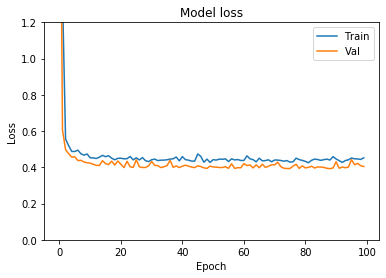

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

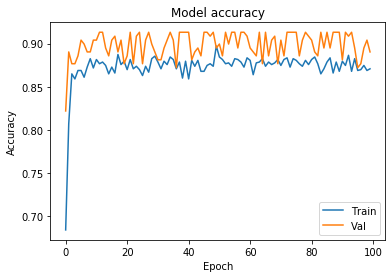

In [30]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

In [31]:
import tensorflow as tf
model_4 = Sequential([
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])
model_4.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

In [32]:
hist_4 = model_4.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 8s 167ms/step - loss: 20.4226 - accuracy: 0.5064 - val_loss: 20.2281 - val_accuracy: 0.5525
Epoch 2/100
32/32 [==============================] - 3s 86ms/step - loss: 20.1660 - accuracy: 0.4921 - val_loss: 19.9732 - val_accuracy: 0.6301
Epoch 3/100
32/32 [==============================] - 3s 103ms/step - loss: 19.9112 - accuracy: 0.5478 - val_loss: 19.7215 - val_accuracy: 0.7215
Epoch 4/100
32/32 [==============================] - 4s 116ms/step - loss: 19.6615 - accuracy: 0.5431 - val_loss: 19.4731 - val_accuracy: 0.7580
Epoch 5/100
32/32 [==============================] - 4s 111ms/step - loss: 19.4134 - accuracy: 0.6028 - val_loss: 19.2279 - val_accuracy: 0.7945
Epoch 6/100
32/32 [==============================] - 4s 121ms/step - loss: 19.1690 - accuracy: 0.6424 - val_loss: 18.9858 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 3s 102ms/step - loss: 18.9279 - accuracy: 0.6693 - val_loss: 18.7468 - val_acc

32/32 [==============================] - 6s 192ms/step - loss: 10.0856 - accuracy: 0.8150 - val_loss: 9.9879 - val_accuracy: 0.8630
Epoch 58/100
32/32 [==============================] - 8s 239ms/step - loss: 9.9607 - accuracy: 0.8212 - val_loss: 9.8636 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 15s 457ms/step - loss: 9.8356 - accuracy: 0.8294 - val_loss: 9.7408 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 12s 367ms/step - loss: 9.7125 - accuracy: 0.8269 - val_loss: 9.6197 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 10s 325ms/step - loss: 9.5923 - accuracy: 0.8286 - val_loss: 9.5001 - val_accuracy: 0.8676
Epoch 62/100
32/32 [==============================] - 5s 173ms/step - loss: 9.4721 - accuracy: 0.8492 - val_loss: 9.3819 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 5s 154ms/step - loss: 9.3551 - accuracy: 0.8251 - val_loss: 9.2653 - val_accuracy: 0.8721
E

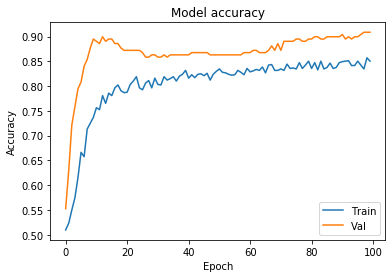

In [34]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()